# Stock Price Prediction 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 

In [3]:
start = '2014-01-01'
end = '2024-09-08'

stock = 'GOOG'
data = yf.download(stock, start, end )

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218
...,...,...,...,...,...,...
2024-08-30,164.220001,165.279999,163.410004,165.110001,165.110001,18498800
2024-09-03,163.315002,163.380005,157.854996,158.610001,158.610001,26533100
2024-09-04,158.074997,160.399994,157.440002,157.809998,157.809998,17410700


In [5]:
data.reset_index(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218
...,...,...,...,...,...,...,...
2683,2024-08-30,164.220001,165.279999,163.410004,165.110001,165.110001,18498800
2684,2024-09-03,163.315002,163.380005,157.854996,158.610001,158.610001,26533100
2685,2024-09-04,158.074997,160.399994,157.440002,157.809998,157.809998,17410700
2686,2024-09-05,157.779999,161.014999,157.520004,158.600006,158.600006,14139500


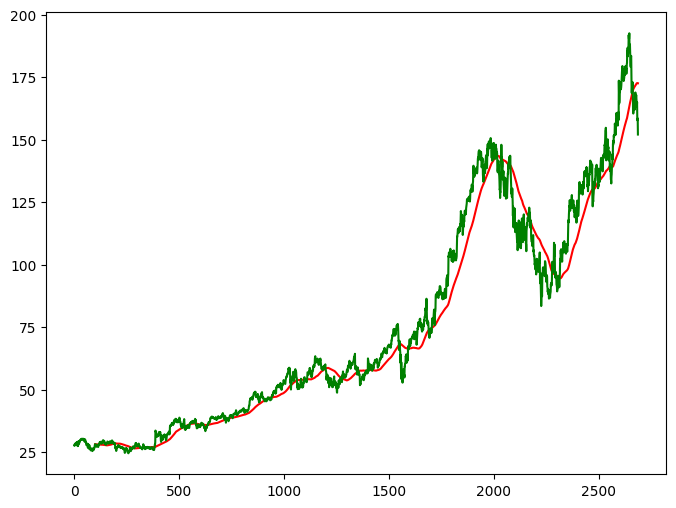

In [11]:
# 100 days Moving Average 
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

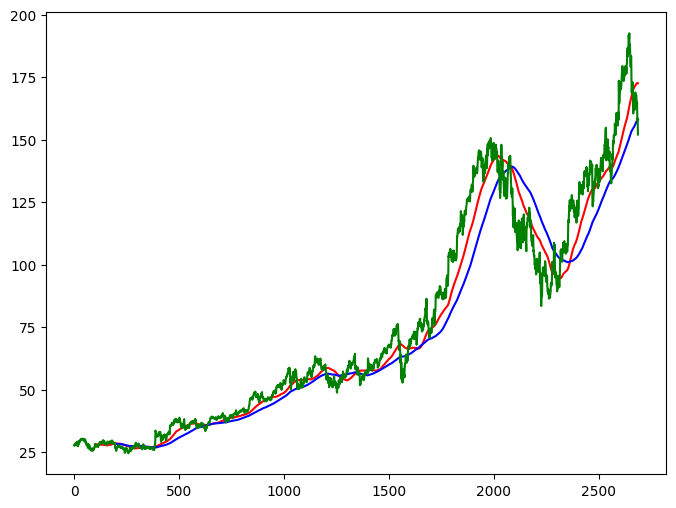

In [12]:
# 200 days Moving Average 
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [13]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [16]:
data_train = pd.DataFrame(data.Close[0 : int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80) : len(data)] )

In [22]:
data_train.shape[0]

2150

In [23]:
data_test.shape[0]

538

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_train_scaled = scaler.fit_transform(data_train)

In [27]:
x = []
y = []

for i in range(100, data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100 : i])
    y.append(data_train_scaled[i, 0]) 


In [34]:
x, y = np.array(x), np.array(y)

In [35]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [37]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\rawat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(optimizer='adam', loss='mean_squared_error' )

In [39]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 251ms/step - loss: 0.0548
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - loss: 0.0069
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step - loss: 0.0056
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - loss: 0.0047
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - loss: 0.0045
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 256ms/step - loss: 0.0040
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - loss: 0.0039
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 255ms/step - loss: 0.0036
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 258ms/step - loss: 0.0046
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step - loss: 0.0037
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - loss: 0.0039
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 259ms/step - loss: 0.0036
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - loss: 0.0036
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - loss: 0.0031
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [41]:
pass_100_days = data_train.tail(100)

In [42]:
data_test = pd.concat([pass_100_days, data_test], ignore_index=True)

In [43]:
data_test

,Close
0,127.584999
1,132.673492
2,134.519501
3,134.891006
4,134.167999
...,...
633,165.110001
634,158.610001
635,157.809998
636,158.600006


In [44]:
data_test_scaled = scaler.fit_transform(data_test)

In [47]:
x = []
y = []

for i in range(100, data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100 : i])
    y.append(data_test_scaled[i, 0]) 

x, y =  np.array(x), np.array(y)

In [48]:
y_pred = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step


In [52]:
scale = 1 / scaler.scale_

In [53]:
y_pred = y_pred * scale

In [54]:
y = y * scale

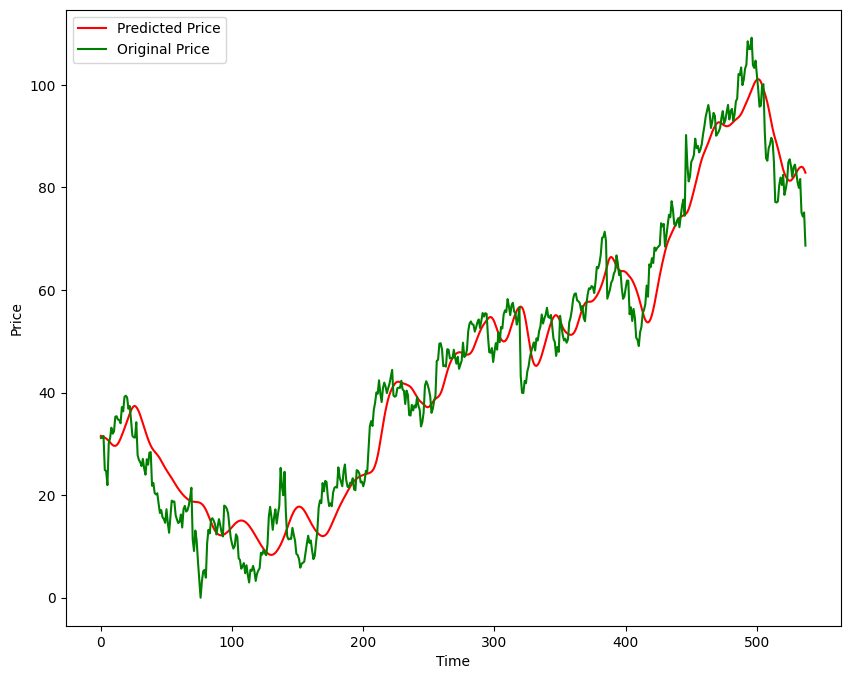

In [57]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, 'r', label= 'Predicted Price')
plt.plot(y, 'g', label= 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
model.save('Stock Prediction Model.keras')